<a href="https://colab.research.google.com/github/Storkluc/Python/blob/master/Trabalho_final_parte_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho integrado Ciência de dados e Python 01

###Importação de bibliotecas

In [42]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = 8,6
sns.set_style("darkgrid")

from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

###Importando e checando a Base

In [43]:
uploaded = files.upload() #Carregando base a partir do computador.

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [44]:
df_discretizacao = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']),sep=';') #Criando um Dataframe de um banco que tem perdido clientes.

In [45]:
df_discretizacao.shape

(10000, 12)

In [46]:
df_discretizacao.head(5) #Verificando as cinco primeiras linhas do Dataframe.

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
df_discretizacao.describe() # Estatísticas do Dataframe

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


###One-hot Enconding

In [48]:
df_onehot = df_discretizacao[['Geography','Gender']] #Criando uma base com o método one-hot encoding.

In [49]:
df_onehot.count() #Verificando as colunas da nova base.

Geography    10000
Gender       10000
dtype: int64

In [50]:
df_onehot.shape

(10000, 2)

In [51]:
#Listando os valores da nova base.

print(df_onehot['Geography'].unique(),'\n')
print(df_onehot['Gender'].unique(), '\n')

['France' 'Spain' 'Germany'] 

['Female' 'Male'] 



In [52]:
# Usando o método get_dummies para codificar os valores usando one-hot encoding.

Geography = pd.get_dummies(df_onehot['Geography'],)
Gender = pd.get_dummies(df_onehot['Gender'])

In [53]:
# Resultado da transformação para one-hot encoding.
Geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [54]:
# Estatísticas da base Geography.
Geography.describe()

,France,Germany,Spain
count,10000.000000,10000.000000,10000.000000
mean,0.501400,0.250900,0.247700
std,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [55]:
# Resultado da transformação para one-hot encoding.
Gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [56]:
# Estatísticas da base Gender.
Gender.describe()

,Female,Male
count,10000.000000,10000.000000
mean,0.454300,0.545700
std,0.497932,0.497932
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


###Label Enconding - Códificação  por rótulos

In [83]:
le = LabelEncoder() # Criando um objeto LabelEncoder.

In [84]:
le.fit(df_onehot['Geography']) # Passando o atributo que será convertido.

LabelEncoder()

In [ ]:
df_onehot['Geography'] = le.transform(df_onehot['Geography']) # Passando para nova coluna os valores convertidos.

In [60]:
df_onehot.head() # Visualizando as primeiras linhas da conversão.

,Geography,Gender
0,0,Female
1,2,Female
2,0,Female
3,0,Female
4,2,Female


In [61]:
#O processo se repete para a coluna Gender.

In [ ]:
le.fit(df_onehot['Gender'])
df_onehot['Gender'] = le.transform(df_onehot['Gender'])
df_onehot.head()

In [63]:
df_onehot.describe() # Estastísticas da conversão.

,Geography,Gender
count,10000.000000,10000.000000
mean,0.746300,0.545700
std,0.827529,0.497932
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,2.000000,1.000000


###Técnica 01 - Discretização com comprimento fixo

In [93]:
# Visulializando as primeiras linhas do Dataframe original
df_fixo = df_discretizacao
df_fixo.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins,CreditScore_bins
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Bin_no_4,Bin_no_6
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Bin_no_4,Bin_no_6
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Bin_no_4,Bin_no_4
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Bin_no_3,Bin_no_7
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Bin_no_4,Bin_no_10


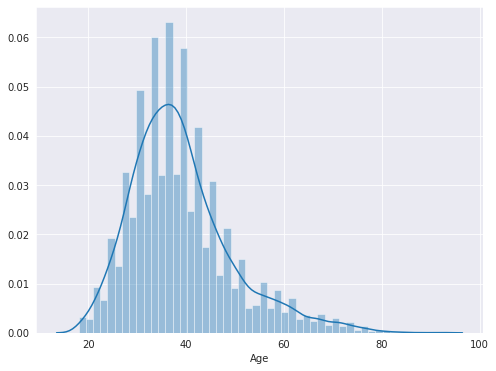

In [94]:
# Plotando os dados da coluna Age.
sns.distplot(df_fixo['Age'])

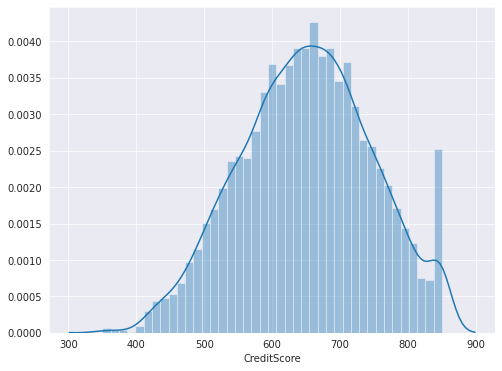

In [66]:
# Plotando os dados da coluna Age.
sns.distplot(df_fixo['CreditScore'])

In [67]:
# Verificando a faixa de valores do atributo Age.
age_range = df_fixo['Age'].max() - df_fixo['Age'].min()
print(age_range)

74


In [68]:
# Verificando a faixa de valores do atributo CreditScore.
creditscore_range = df_fixo['CreditScore'].max() - df_fixo['CreditScore'].min()
print(creditscore_range)

500


In [69]:
# Verificando como ficam o valor das faixas que serão dividas as idades.
age_range / 11

6.7272727272727275

In [70]:
# Verificando como ficam o valor das faixas que serão dividas os scores dos clientes.
creditscore_range / 11

45.45454545454545

In [71]:
# Verificando os valores das faixas do atributo Age em valores inteiros.

lower_interval_age = int(np.floor(df_fixo['Age'].min())) 
upper_interval_age = int(np.ceil(df_fixo['Age'].max()))
interval_length_age = int(np.round(age_range / 10))

print(lower_interval_age)
print(upper_interval_age)
print(interval_length_age)

18
92
7


In [72]:
# Verificando os valores das faixas do atributo CreditScore em valores inteiros.

lower_interval_credit = int(np.floor(df_fixo['CreditScore'].min())) 
upper_interval_credit = int(np.ceil(df_fixo['CreditScore'].max()))
interval_length_credit = int(np.round(creditscore_range / 10))

print(lower_interval_credit)
print(upper_interval_credit)
print(interval_length_credit)

350
850
50


In [73]:
# Criando as faixas de Age.

total_bins_age = [i for i in range(lower_interval_age, upper_interval_age + interval_length_age, interval_length_age)]
print(total_bins_age)

[18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95]


In [74]:
# Criando as faixas de CreditScore.

total_bins_credit = [i for i in range(lower_interval_credit, upper_interval_credit + interval_length_credit, interval_length_credit)]
print(total_bins_credit)

[350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]


In [75]:
# Criando os intervalos para o atributo Age.

bin_labels_age = ['Bin_no_'+str(i) for i in range(1, len(total_bins_age))] # **Não consegui identificar porque foram criadas 11 faixas.
print(bin_labels_age)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10', 'Bin_no_11']


In [76]:
# Criando os intervalos para o atributo CreditScore.

bin_labels_credit = ['Bin_no_'+str(i) for i in range(1, len(total_bins_credit))]
print(bin_labels_credit)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [77]:
# Visualizando o resultado no Dataframe

df_fixo['Age_bins'] = pd.cut(x=df_fixo['Age'], bins=total_bins_age, labels=bin_labels_age, include_lowest=True)
df_fixo['CreditScore_bins'] = pd.cut(x=df_fixo['CreditScore'], bins=total_bins_credit, labels=bin_labels_credit, include_lowest=True)
df_fixo.head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins,CreditScore_bins
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Bin_no_4,Bin_no_6
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Bin_no_4,Bin_no_6
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Bin_no_4,Bin_no_4
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Bin_no_3,Bin_no_7
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Bin_no_4,Bin_no_10
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Bin_no_4,Bin_no_6
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Bin_no_5,Bin_no_10
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Bin_no_2,Bin_no_1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Bin_no_4,Bin_no_4
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,Bin_no_2,Bin_no_7


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

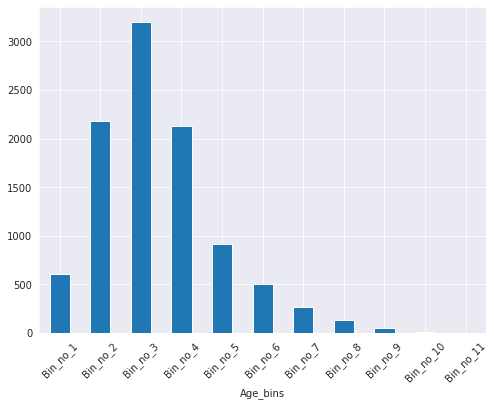

In [78]:
# Visualização das faixas do atributo Age em gráfico de barras.
df_fixo.groupby('Age_bins')['Age'].count().plot.bar()
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

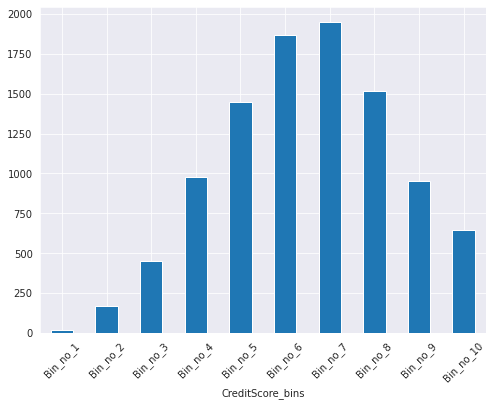

In [79]:
# Visualização das faixas do atributo CreditScore em gráfico de barras.
df_fixo.groupby('CreditScore_bins')['CreditScore'].count().plot.bar()
plt.xticks(rotation=45)

In [80]:
# Estatísticas das faixas criadas para o atributo Age.
df_fixo.groupby('Age_bins').describe()

CustomerId                               ... Exited          
               count          mean            std  ...    50%  75%  max
Age_bins                                           ...                 
Bin_no_1       611.0  1.568992e+07   70048.435161  ...    0.0  0.0  1.0
Bin_no_2      2179.0  1.569035e+07   71352.185014  ...    0.0  0.0  1.0
Bin_no_3      3197.0  1.569117e+07   72067.630801  ...    0.0  0.0  1.0
Bin_no_4      2128.0  1.569108e+07   72496.047542  ...    0.0  1.0  1.0
Bin_no_5       919.0  1.568990e+07   72026.908531  ...    1.0  1.0  1.0
Bin_no_6       502.0  1.569462e+07   73174.869358  ...    1.0  1.0  1.0
Bin_no_7       272.0  1.569151e+07   70154.282242  ...    0.0  1.0  1.0
Bin_no_8       138.0  1.568217e+07   74839.838230  ...    0.0  0.0  1.0
Bin_no_9        46.0  1.571006e+07   72118.268173  ...    0.0  0.0  0.0
Bin_no_10        6.0  1.571252e+07  106775.434669  ...    0.0  0.0  1.0
Bin_no_11        2.0  1.571290e+07   73573.753476  ...    0.0  0.0  0.0

[11 rows x 80 columns]

In [81]:
# Estatísticas das faixas criadas para o atributo Age.
df_fixo.groupby('CreditScore_bins').describe()

CustomerId                              ... Exited          
                      count          mean           std  ...    50%  75%  max
CreditScore_bins                                         ...                 
Bin_no_1               19.0  1.571181e+07  66773.261050  ...    1.0  1.0  1.0
Bin_no_2              170.0  1.569249e+07  73900.218150  ...    0.0  0.0  1.0
Bin_no_3              454.0  1.569016e+07  74251.932574  ...    0.0  0.0  1.0
Bin_no_4              978.0  1.568976e+07  70890.745990  ...    0.0  0.0  1.0
Bin_no_5             1445.0  1.568987e+07  71849.720399  ...    0.0  0.0  1.0
Bin_no_6             1871.0  1.569222e+07  71506.294318  ...    0.0  0.0  1.0
Bin_no_7             1947.0  1.568915e+07  72043.983841  ...    0.0  0.0  1.0
Bin_no_8             1518.0  1.569118e+07  72460.283563  ...    0.0  0.0  1.0
Bin_no_9              953.0  1.569345e+07  71992.667630  ...    0.0  0.0  1.0
Bin_no_10             645.0  1.569209e+07  71458.320229  ...    0.0  0.0  1.0

[10 rows x 80 columns]

###Técnica 02 - Discretização com frequência fixa

In [95]:
#Carregando base a partir do computador.
uploaded = files.upload() 

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [96]:
# Carregando o Dataframe.
df_frequencia_fixa = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']),sep=';') 

In [97]:
# Visualizando os primeiros dados da base.
df_frequencia_fixa.head() 

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [98]:
# Realizando a discretização com 10 quartis para o atributo CreditScore.
discreted_score, bins_score = pd.qcut(df_frequencia_fixa['CreditScore'],10, labels=None, retbins=True, precision=3, duplicates='raise')
pd.concat([discreted_score,df_frequencia_fixa['CreditScore']], axis=1).head(10)

,CreditScore,CreditScore
0,"(598.7, 627.0]",619
1,"(598.7, 627.0]",608
2,"(349.999, 521.0]",502
3,"(678.0, 704.0]",699
4,"(778.0, 850.0]",850
5,"(627.0, 652.0]",645
6,"(778.0, 850.0]",822
7,"(349.999, 521.0]",376
8,"(349.999, 521.0]",501
9,"(678.0, 704.0]",684


In [99]:
# Realizando a discretização com 10 quartis para o atributo Age.
discreted_age, bins_age = pd.qcut(df_frequencia_fixa['Age'],10, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([discreted_age,df_frequencia_fixa['Age']], axis=1).head(10)

,Age,Age
0,"(40.0, 42.0]",42
1,"(40.0, 42.0]",41
2,"(40.0, 42.0]",42
3,"(37.0, 40.0]",39
4,"(42.0, 46.0]",43
5,"(42.0, 46.0]",44
6,"(46.0, 53.0]",50
7,"(27.0, 31.0]",29
8,"(42.0, 46.0]",44
9,"(17.999, 27.0]",27


In [100]:
# As faixas basedas nos quartis.
print(' Age:',bins_age,'\n', 'CreditScore:',bins_score)
print(type(bins_age), type(bins_score))

 Age: [18. 27. 31. 33. 35. 37. 40. 42. 46. 53. 92.] 
 CreditScore: [350.  521.  566.  598.7 627.  652.  678.  704.  735.  778.  850. ]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [101]:
# Quantidade de valores por quartil.
discreted_age.value_counts()

(27.0, 31.0]      1352
(37.0, 40.0]      1332
(17.999, 27.0]    1020
(42.0, 46.0]      1009
(53.0, 92.0]       966
(35.0, 37.0]       934
(33.0, 35.0]       921
(46.0, 53.0]       919
(31.0, 33.0]       860
(40.0, 42.0]       687
Name: Age, dtype: int64

In [102]:
discreted_score.value_counts()

(598.7, 627.0]      1030
(521.0, 566.0]      1008
(652.0, 678.0]      1005
(627.0, 652.0]      1005
(704.0, 735.0]      1003
(349.999, 521.0]    1002
(735.0, 778.0]       998
(566.0, 598.7]       990
(778.0, 850.0]       981
(678.0, 704.0]       978
Name: CreditScore, dtype: int64

In [103]:
# Criação das faixas.

bin_labels_age = ['Bin_no_'+str(i) for i in range(1,11)]
print('Age:', bin_labels_age)
bin_labels_score = ['Bin_no_'+str(i) for i in range(1,11)]
print('CreditScore', bin_labels_score)

Age: ['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']
CreditScore ['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [104]:
# Acrestantdo as faixas ao Dataframe.

df_frequencia_fixa['Age_bins'] = pd.cut(x=df_frequencia_fixa['Age'], bins=bins_age, labels=bin_labels_age, include_lowest=True)
df_frequencia_fixa['CreditScore_bins'] = pd.cut(x=df_frequencia_fixa['CreditScore'], bins=bins_score, labels=bin_labels_score, include_lowest=True)
df_frequencia_fixa.head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins,CreditScore_bins
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Bin_no_7,Bin_no_4
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Bin_no_7,Bin_no_4
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Bin_no_7,Bin_no_1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Bin_no_6,Bin_no_7
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Bin_no_8,Bin_no_10
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Bin_no_8,Bin_no_5
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Bin_no_9,Bin_no_10
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Bin_no_2,Bin_no_1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Bin_no_8,Bin_no_1
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,Bin_no_1,Bin_no_7


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

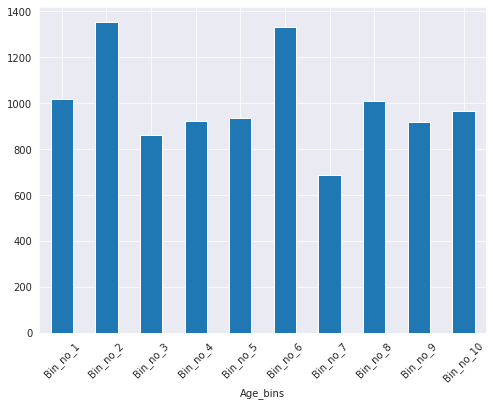

In [105]:
# Gráfico de distribuição por faixa.

df_frequencia_fixa.groupby('Age_bins')['Age'].count().plot.bar()
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

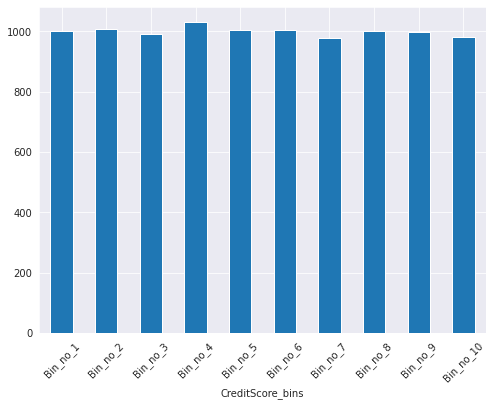

In [106]:
df_frequencia_fixa.groupby('CreditScore_bins')['CreditScore'].count().plot.bar()
plt.xticks(rotation=45)

In [107]:
# Estatísticas das faixas criadas.
df_frequencia_fixa.groupby('Age_bins').describe()

CustomerId                              ... Exited          
               count          mean           std  ...    50%  75%  max
Age_bins                                          ...                 
Bin_no_1      1020.0  1.569017e+07  69839.957400  ...    0.0  0.0  1.0
Bin_no_2      1352.0  1.568958e+07  72108.409141  ...    0.0  0.0  1.0
Bin_no_3       860.0  1.568897e+07  71730.054691  ...    0.0  0.0  1.0
Bin_no_4       921.0  1.569157e+07  72449.259947  ...    0.0  0.0  1.0
Bin_no_5       934.0  1.569405e+07  71320.121258  ...    0.0  0.0  1.0
Bin_no_6      1332.0  1.569041e+07  72353.684382  ...    0.0  0.0  1.0
Bin_no_7       687.0  1.569045e+07  73515.134522  ...    0.0  0.0  1.0
Bin_no_8      1009.0  1.569191e+07  71680.169525  ...    0.0  1.0  1.0
Bin_no_9       919.0  1.568990e+07  72026.908531  ...    1.0  1.0  1.0
Bin_no_10      966.0  1.569285e+07  72802.727254  ...    0.0  1.0  1.0

[10 rows x 80 columns]

In [108]:
df_frequencia_fixa.groupby('CreditScore_bins').describe()

CustomerId                              ... Exited          
                      count          mean           std  ...    50%  75%  max
CreditScore_bins                                         ...                 
Bin_no_1             1002.0  1.569063e+07  72034.372752  ...    0.0  0.0  1.0
Bin_no_2             1008.0  1.569203e+07  71930.417292  ...    0.0  0.0  1.0
Bin_no_3              990.0  1.568735e+07  71462.728962  ...    0.0  0.0  1.0
Bin_no_4             1030.0  1.569070e+07  72629.557389  ...    0.0  0.0  1.0
Bin_no_5             1005.0  1.569295e+07  71174.591225  ...    0.0  0.0  1.0
Bin_no_6             1005.0  1.569124e+07  72490.485886  ...    0.0  0.0  1.0
Bin_no_7              978.0  1.568804e+07  71432.997773  ...    0.0  0.0  1.0
Bin_no_8             1003.0  1.569308e+07  72188.753162  ...    0.0  0.0  1.0
Bin_no_9              998.0  1.569151e+07  72479.523413  ...    0.0  0.0  1.0
Bin_no_10             981.0  1.569178e+07  71580.082992  ...    0.0  0.0  1.0

[10 rows x 80 columns]

###Técnica 03 - Discretização usando  algoritmo k-médio

In [109]:
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (3).csv


In [121]:
df_kmedio = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']),sep=';')

In [111]:
df_kmedio.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
# Utilizando o metodo KBinsDiscretizer para discretizar a coluna total pedido.

discretization_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
discretization_score = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

discretization_age.fit(df_kmedio[['Age']])
discretization_score.fit(df_kmedio[['CreditScore']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [113]:
intevals_age = discretization_age.bin_edges_.tolist()
intevals_score = discretization_score.bin_edges_.tolist()
print('Age:',intevals_age,'\n\nCreditScore:',intevals_score)

Age: [array([18.        , 27.53872283, 33.85817071, 40.25815844, 47.01826441,
       54.11719591, 61.00242853, 67.56035338, 74.08371878, 82.0775076 ,
       92.        ])] 

CreditScore: [array([350.        , 459.05778542, 507.66689081, 547.00438078,
       583.97409403, 620.96958171, 658.99790914, 698.68215845,
       743.86525621, 800.23145666, 850.        ])]


In [114]:
# Criando uma lista com os intervalos criados com o k-médio.
intervals_age = [18., 27.53872283, 33.85817071, 40.25815844, 47.01826441,
       54.11719591, 61.00242853, 67.56035338, 74.08371878, 82.0775076 ,
       92.]
intervals_score = [350., 459.05778542, 507.66689081, 547.00438078,
       583.97409403, 620.96958171, 658.99790914, 698.68215845,
       743.86525621, 800.23145666, 850.]

In [115]:
# Criando as faixas.

bin_labels_age = ['Bin_no_'+str(i) for i in range(1,11)]
bin_labels_score = ['Bin_no_'+str(i) for i in range(1,11)]
print('Age:',bin_labels_age, '\nCreditScore:', bin_labels_score)

Age: ['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10'] 
CreditScore: ['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [116]:
# Inserindo as faixas no Dataframe.

df_kmedio['Age_bins'] = pd.cut(df_kmedio['Age'], bins=intervals_age, labels=bin_labels_age, include_lowest=True)
df_kmedio['CreditScore_bins'] = pd.cut(df_kmedio['CreditScore'], bins=intervals_score, labels=bin_labels_score, include_lowest=True)
df_kmedio.head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins,CreditScore_bins
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Bin_no_4,Bin_no_5
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Bin_no_4,Bin_no_5
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Bin_no_4,Bin_no_2
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Bin_no_3,Bin_no_8
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Bin_no_4,Bin_no_10
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Bin_no_4,Bin_no_6
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Bin_no_5,Bin_no_10
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Bin_no_2,Bin_no_1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Bin_no_4,Bin_no_2
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,Bin_no_1,Bin_no_7


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

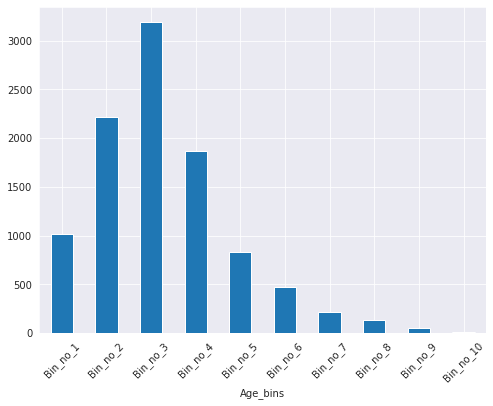

In [117]:
# Plotando o resultado.

df_kmedio.groupby('Age_bins')['Age'].count().plot.bar()
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

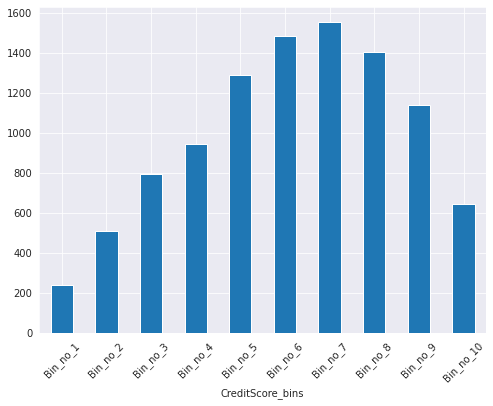

In [118]:
df_kmedio.groupby('CreditScore_bins')['CreditScore'].count().plot.bar()
plt.xticks(rotation=45)

In [119]:
# Estatísticas das faixas criadas.
df_kmedio.groupby('Age_bins').describe()

CustomerId                              ... Exited          
               count          mean           std  ...    50%  75%  max
Age_bins                                          ...                 
Bin_no_1      1020.0  1.569017e+07  69839.957400  ...    0.0  0.0  1.0
Bin_no_2      2212.0  1.568934e+07  71945.914287  ...    0.0  0.0  1.0
Bin_no_3      3187.0  1.569182e+07  72073.468508  ...    0.0  0.0  1.0
Bin_no_4      1871.0  1.569093e+07  72188.694317  ...    0.0  1.0  1.0
Bin_no_5       828.0  1.569031e+07  72826.977131  ...    1.0  1.0  1.0
Bin_no_6       471.0  1.569594e+07  71797.591875  ...    1.0  1.0  1.0
Bin_no_7       219.0  1.569032e+07  71301.606509  ...    0.0  1.0  1.0
Bin_no_8       138.0  1.568217e+07  74839.838230  ...    0.0  0.0  1.0
Bin_no_9        47.0  1.571221e+07  72829.781501  ...    0.0  0.0  0.0
Bin_no_10        7.0  1.569858e+07  92543.500390  ...    0.0  0.0  1.0

[10 rows x 80 columns]

In [120]:
df_kmedio.groupby('CreditScore_bins').describe()

CustomerId                              ... Exited          
                      count          mean           std  ...    50%  75%  max
CreditScore_bins                                         ...                 
Bin_no_1              242.0  1.569274e+07  74996.878093  ...    0.0  1.0  1.0
Bin_no_2              510.0  1.568920e+07  72731.769946  ...    0.0  0.0  1.0
Bin_no_3              793.0  1.569039e+07  70437.144361  ...    0.0  0.0  1.0
Bin_no_4              946.0  1.569017e+07  72020.170574  ...    0.0  0.0  1.0
Bin_no_5             1286.0  1.569031e+07  72528.596325  ...    0.0  0.0  1.0
Bin_no_6             1484.0  1.569201e+07  71364.764316  ...    0.0  0.0  1.0
Bin_no_7             1551.0  1.568887e+07  71681.689278  ...    0.0  0.0  1.0
Bin_no_8             1405.0  1.569224e+07  72113.555260  ...    0.0  0.0  1.0
Bin_no_9             1138.0  1.569223e+07  72523.428442  ...    0.0  0.0  1.0
Bin_no_10             645.0  1.569209e+07  71458.320229  ...    0.0  0.0  1.0

[10 rows x 80 columns]

##Escalamento de atributo

###Técnica 01 - Padronização

In [123]:
uploaded = files.upload() # Importando a base

Saving Churn_Modelling.csv to Churn_Modelling (4).csv


In [124]:
df_padronizacao = pd.read_csv('Churn_Modelling.csv', sep=';') # Carregando o csv na base de dados

In [125]:
df_padronizacao.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [126]:
# Filtrando os dados númericos da base.
df_padronizacao = df_padronizacao[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]

In [127]:
df_padronizacao.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,619,42,2,0.00,101348.88
1,608,41,1,83807.86,112542.58
2,502,42,8,159660.80,113931.57
3,699,39,1,0.00,93826.63
4,850,43,2,125510.82,79084.10


In [128]:
# Estatísticas da nova base.
df_padronizacao.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [129]:
# Transformando os dados do Dataframe.
scaler = StandardScaler()
scaler.fit(df_padronizacao)

df_padronizacao_data_scaled = scaler.transform(df_padronizacao)

In [130]:
# Dataframe com os atributos escalados.
df_padronizacao_data_scaled = pd.DataFrame(df_padronizacao_data_scaled, columns = df_padronizacao.columns)
# Exibindo os primeiros dados do Dataframe.
df_padronizacao_data_scaled.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,0.216534
2,-1.536794,0.293517,1.032908,1.333053,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.365276


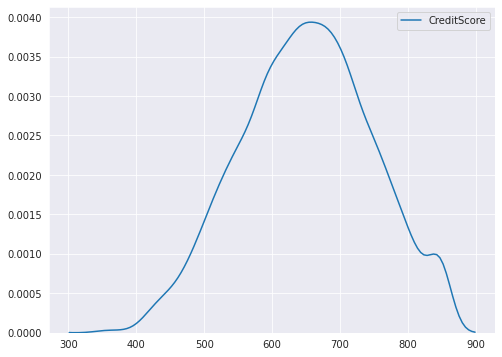

In [131]:
# Distribuição do atributo CreditScore
sns.kdeplot(df_padronizacao['CreditScore'])

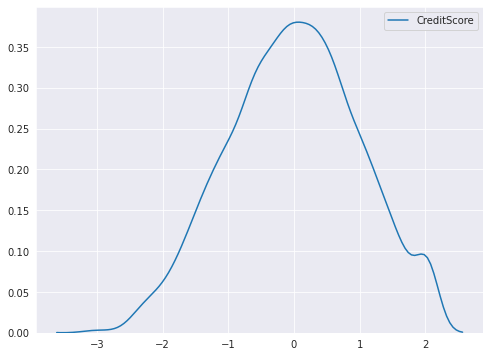

In [132]:
# Distribuição após o processo de escalamento.
sns.kdeplot(df_padronizacao_data_scaled['CreditScore'])

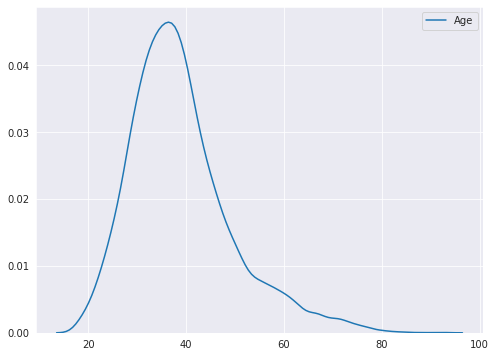

In [133]:
# Distribuição atributo Age.
sns.kdeplot(df_padronizacao['Age'])

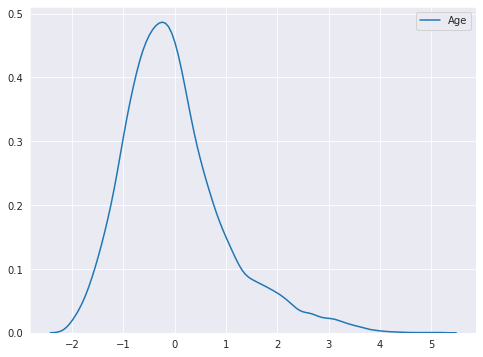

In [134]:
# Distribuição após o processo de escalamento.
sns.kdeplot(df_padronizacao_data_scaled['Age'])

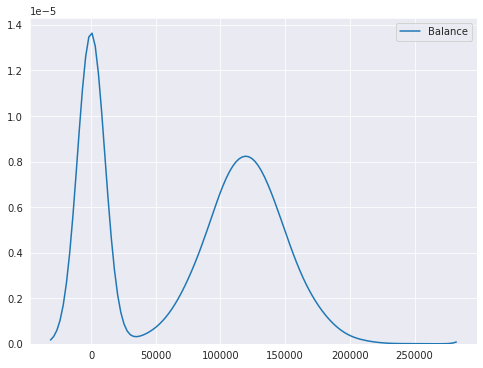

In [135]:
# Distribuição atributo Age.
sns.kdeplot(df_padronizacao['Balance'])

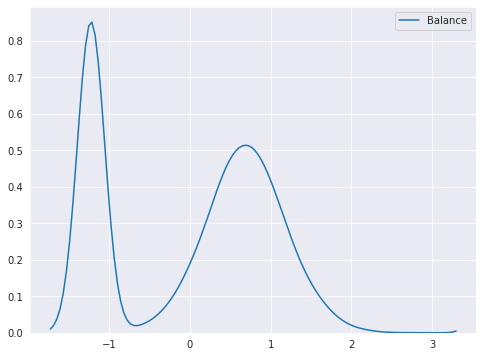

In [136]:
# Distribuição após o processo de escalamento.
sns.kdeplot(df_padronizacao_data_scaled['Balance'])

In [137]:
df_padronizacao_data_scaled.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.870326e-16,2.484679e-16,-1.400324e-16,-5.978551e-17,-1.580958e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-1.740268e+00
25%,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-8.535935e-01
50%,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,1.802807e-03
75%,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.572431e-01
max,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,1.737200e+00


###Ténica 02 - Escalamento Min-Max

In [139]:
# Realizando a transformação do Dataframe utilizando a classe MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_padronizacao)
df_minmax_scarled = scaler.transform(df_padronizacao)

In [140]:
# Criando Dataframe com os atributos escalados.
df_minmax_scarled = pd.DataFrame(df_minmax_scarled,columns = df_padronizacao.columns)
df_minmax_scarled.head(10)

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,0.538,0.324324,0.2,0.000000,0.506735
1,0.516,0.310811,0.1,0.334031,0.562709
2,0.304,0.324324,0.8,0.636357,0.569654
3,0.698,0.283784,0.1,0.000000,0.469120
4,1.000,0.337838,0.2,0.500246,0.395400
5,0.590,0.351351,0.8,0.453394,0.748797
6,0.944,0.432432,0.7,0.000000,0.050261
7,0.052,0.148649,0.4,0.458540,0.596733
8,0.302,0.351351,0.4,0.566170,0.374680
9,0.668,0.121622,0.2,0.536488,0.358605


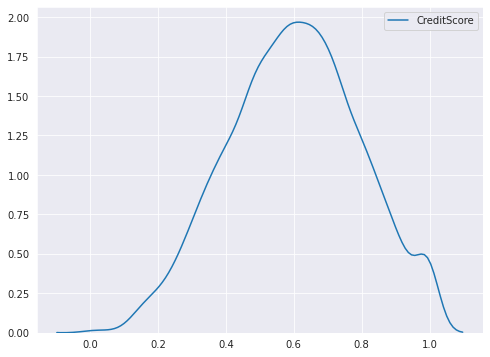

In [141]:
# Distribuição dos dados do atributo CreditScore.
sns.kdeplot(df_minmax_scarled['CreditScore'])

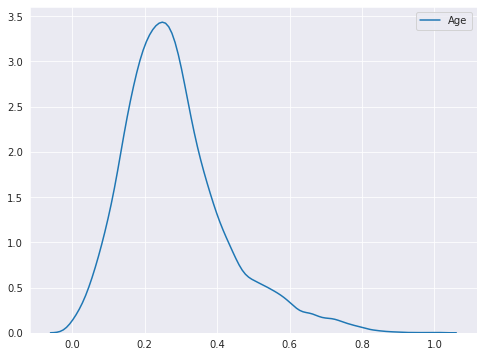

In [142]:
# Distribuição Age.
sns.kdeplot(df_minmax_scarled['Age'])

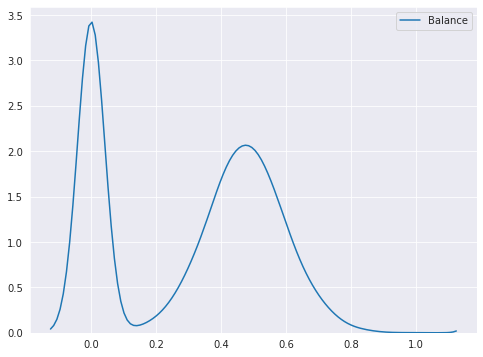

In [143]:
# Distribuição Age.
sns.kdeplot(df_minmax_scarled['Balance'])

In [144]:
# Estatísticas da nova base
df_minmax_scarled.describe() 

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,0.501280,0.304848,0.500441
std,0.193307,0.141727,0.289217,0.248696,0.287580
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.300000,0.000000,0.254977
50%,0.604000,0.256757,0.500000,0.387402,0.500960
75%,0.736000,0.351351,0.700000,0.508749,0.746955
max,1.000000,1.000000,1.000000,1.000000,1.000000


###Técnica 03 - Escalamento pela média

In [145]:
# Calculo da média para todos os atributos.
mean_vals = df_padronizacao.mean(axis=0)
mean_vals

CreditScore           650.528800
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
EstimatedSalary    100090.239881
dtype: float64

In [146]:
# Cálculo da faixa para todos os atributos.
range_vals = df_padronizacao.max(axis=0) - df_padronizacao.min(axis=0)
range_vals

CreditScore           500.00
Age                    74.00
Tenure                 10.00
Balance            250898.09
EstimatedSalary    199980.90
dtype: float64

In [147]:
# Aplicando o escalamento pela média em toda a base.
df_media_scaled = (df_padronizacao - mean_vals) / range_vals

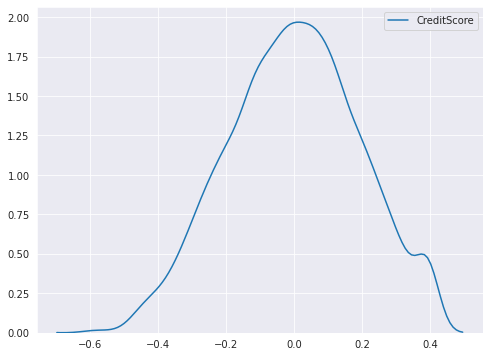

In [148]:
# Distribuição do atributo CreditScore.
sns.kdeplot(df_media_scaled['CreditScore'])

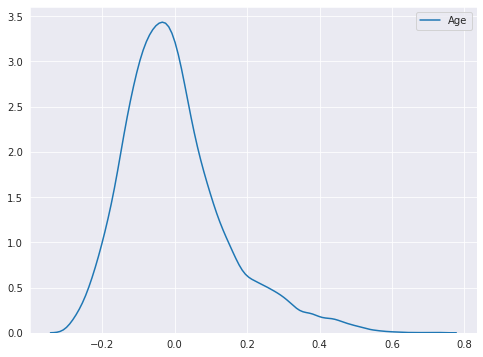

In [149]:
# Distribuição do atributo Age.
sns.kdeplot(df_media_scaled['Age'])

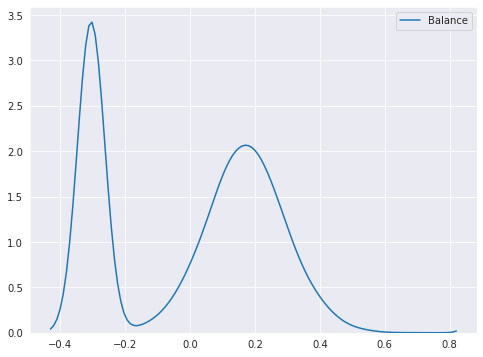

In [150]:
# Distribuição do atributo Balance.
sns.kdeplot(df_media_scaled['Balance'])

In [151]:
df_media_scaled.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-9.467982e-17,3.660683e-17,1.098288e-17,1.506353e-15,1.010908e-15
std,1.933066e-01,1.417271e-01,2.892174e-01,2.486962e-01,2.875799e-01
min,-6.010576e-01,-2.827270e-01,-5.012800e-01,-3.048484e-01,-5.004411e-01
25%,-1.330576e-01,-9.353784e-02,-2.012800e-01,-3.048484e-01,-2.454641e-01
50%,2.942400e-03,-2.597027e-02,-1.280000e-03,8.255404e-02,5.184251e-04
75%,1.349424e-01,6.862432e-02,1.987200e-01,2.039009e-01,2.465136e-01
max,3.989424e-01,7.172730e-01,4.987200e-01,6.951516e-01,4.995589e-01


###Técnica 04 - Escalamento pelo máximo absoluto

In [152]:
# Realizando a transformação da base.

df_maxabs = df_padronizacao
scaler = MaxAbsScaler()
scaler.fit(df_maxabs)

MaxAbsScaler(copy=True)

In [153]:
# Criando uma base com os dados escalados.
df_maxabs_scaled = pd.DataFrame(df_minmax_scarled, columns=df_maxabs.columns)
df_minmax_scarled.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,0.538,0.324324,0.2,0.000000,0.506735
1,0.516,0.310811,0.1,0.334031,0.562709
2,0.304,0.324324,0.8,0.636357,0.569654
3,0.698,0.283784,0.1,0.000000,0.469120
4,1.000,0.337838,0.2,0.500246,0.395400


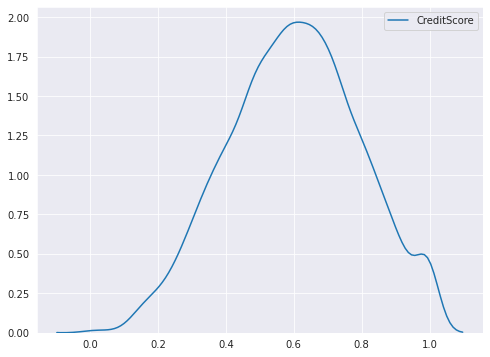

In [154]:
# Verificando a distribuíção de dados do atributo CreditScore.
sns.kdeplot(df_maxabs_scaled['CreditScore'])

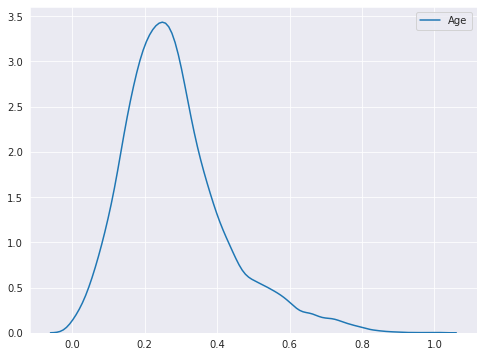

In [155]:
# Distribuíção de dados do atributo Age.
sns.kdeplot(df_maxabs_scaled['Age'])

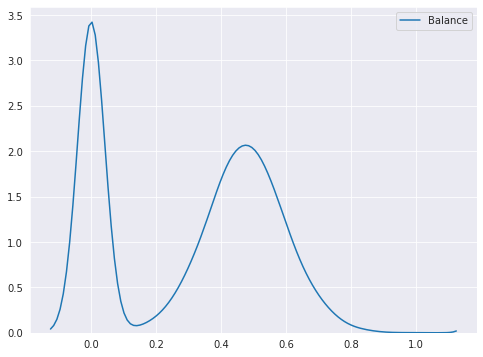

In [156]:
# Distribuíção de dados do atributo Balance.
sns.kdeplot(df_maxabs_scaled['Balance'])

In [157]:
df_maxabs_scaled.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,0.501280,0.304848,0.500441
std,0.193307,0.141727,0.289217,0.248696,0.287580
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.300000,0.000000,0.254977
50%,0.604000,0.256757,0.500000,0.387402,0.500960
75%,0.736000,0.351351,0.700000,0.508749,0.746955
max,1.000000,1.000000,1.000000,1.000000,1.000000


###Técnica 05 - Escalamento pela média e quartil


In [158]:
# Covertendo a base de dados.
df_mediaquartil = df_padronizacao

scaler = RobustScaler()
scaler.fit(df_mediaquartil)

df_mediaquartil_scaled = scaler.transform(df_mediaquartil)

In [159]:
# Criando Dataframe com dados escalados.
df_mediaquartil_scaled = pd.DataFrame(df_mediaquartil_scaled, columns=df_mediaquartil.columns)
# Exibindo as primeiras linha do novo Dataframe.
df_mediaquartil_scaled.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,-0.246269,0.416667,-0.75,-0.761480,0.011739
1,-0.328358,0.333333,-1.00,-0.104906,0.125512
2,-1.119403,0.416667,0.75,0.489346,0.139630
3,0.350746,0.166667,-1.00,-0.761480,-0.064717
4,1.477612,0.500000,-0.75,0.221806,-0.214561


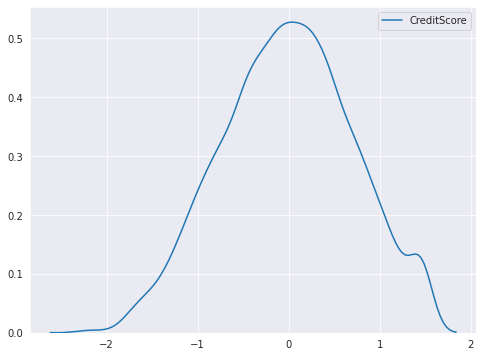

In [160]:
# Distribuíção de dados do atributo CreditScore.
sns.kdeplot(df_mediaquartil_scaled['CreditScore'])

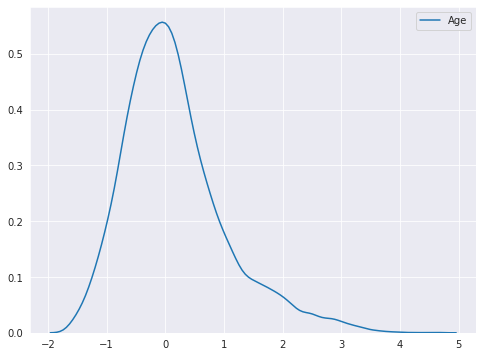

In [161]:
# Distribuição do atributo Age.
sns.kdeplot(df_mediaquartil_scaled['Age'])

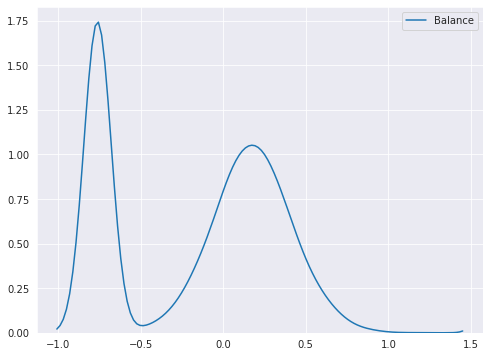

In [162]:
# Distribuição do atributo Balance.
sns.kdeplot(df_mediaquartil_scaled['Balance'])

In [163]:
# Estatísticas do Dataframe.
df_mediaquartil_scaled.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,-0.010979,0.160150,0.003200,-1.622686e-01,-0.001054
std,0.721293,0.873984,0.723044,4.888384e-01,0.584539
min,-2.253731,-1.583333,-1.250000,-7.614800e-01,-1.018257
25%,-0.507463,-0.416667,-0.500000,-7.614800e-01,-0.499987
50%,0.000000,0.000000,0.000000,-5.700193e-17,0.000000
75%,0.492537,0.583333,0.500000,2.385200e-01,0.500013
max,1.477612,4.583333,1.250000,1.204124e+00,1.014356


###Técnica 06 - Escalamento pelo vetor de comprimento unitário

In [164]:
# Transformando a base dados.
df_normalize = df_padronizacao
df_normalize.dropna(inplace=True)
scaler=Normalizer(norm='l1')
scaler.fit(df_normalize)

Normalizer(copy=True, norm='l1')

In [165]:
df_normalize_scaled = scaler.transform(df_normalize)

In [166]:
# Criando o novo Dataframe.
df_normalize_scaled = pd.DataFrame(df_normalize_scaled, columns=df_normalize.columns)
# Exibindo as primeiras linhas da nova base.
df_normalize_scaled.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,0.006068,0.000412,0.000020,0.000000,0.993501
1,0.003086,0.000208,0.000005,0.425420,0.571281
2,0.001831,0.000153,0.000029,0.582397,0.415590
3,0.007392,0.000412,0.000011,0.000000,0.992185
4,0.004136,0.000209,0.000010,0.610788,0.384856


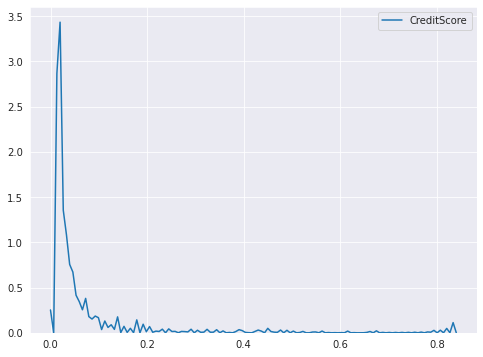

In [167]:
# Distribuição dos dados do atributo CreditScore.
sns.kdeplot(df_normalize_scaled['CreditScore'])

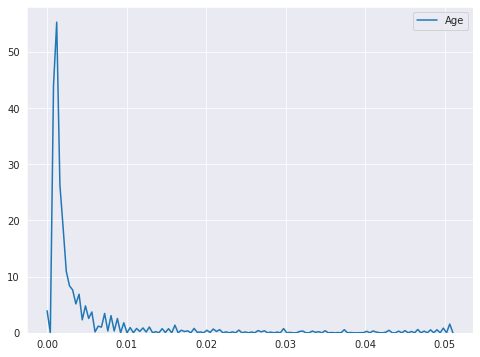

In [168]:
# Distribuição dos dados do atributo Age.
sns.kdeplot(df_normalize_scaled['Age'])

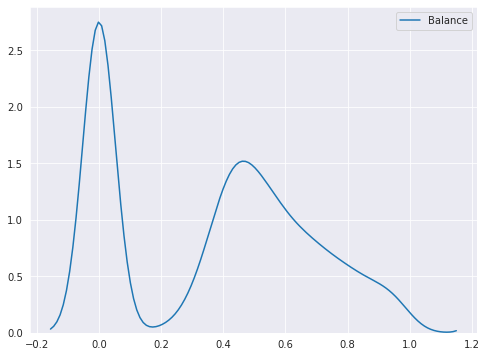

In [169]:
# Distribuição dos dados do atributo Age.
sns.kdeplot(df_normalize_scaled['Balance'])

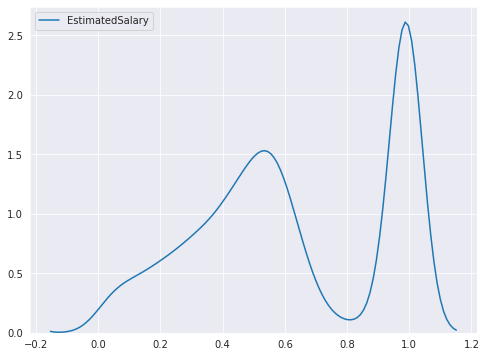

In [170]:
# Distribuição dos dados do atributo Age.
sns.kdeplot(df_normalize_scaled['EstimatedSalary'])

In [171]:
df_normalize_scaled.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.009376,0.000558,0.000072,0.367186,0.622808
std,0.035589,0.002191,0.000341,0.310413,0.305278
min,0.001014,0.000051,0.000000,0.000000,0.000094
25%,0.002652,0.000153,0.000014,0.000000,0.396057
50%,0.003675,0.000216,0.000028,0.426550,0.569616
75%,0.005545,0.000341,0.000048,0.599700,0.988928
max,0.838976,0.050977,0.012266,0.993778,0.997677
